In [19]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

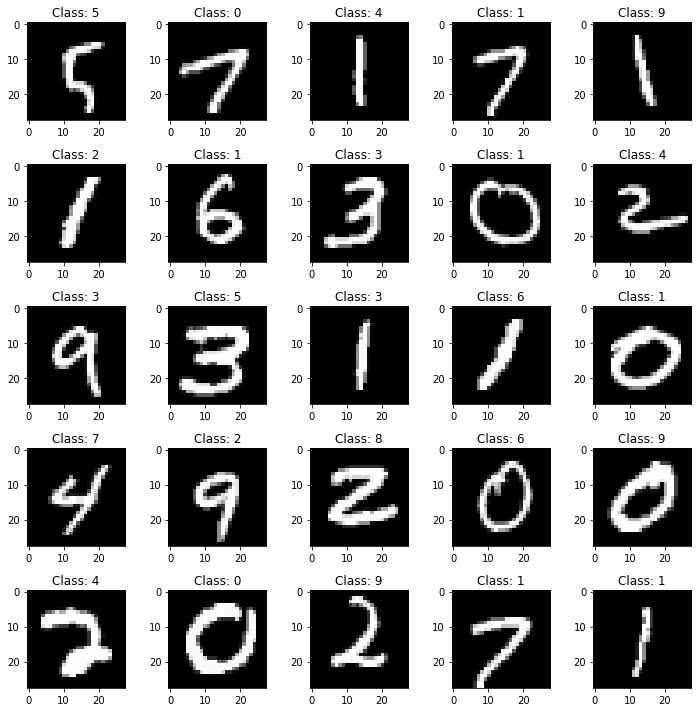

In [14]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx+100], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))
    
plt.tight_layout()

In [15]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
img_rows, img_cols = X_test.shape[1], X_test.shape[2]
X_train = X_train.reshape(-1,img_rows,img_cols,1)
X_test = X_test.reshape(-1,img_rows,img_cols,1)

input_shape = (img_rows,img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
if np.max(X_train) >1: X_train = X_train/255
if np.max(X_test) >1: X_test = X_test/255

In [18]:
X_test.max()

1.0

In [25]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [31]:
model = Sequential([
    
    Conv2D(filters = 32, kernel_size =(3,3), input_shape = input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters = 64, kernel_size =(3,3)),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(512, activation = 'relu'),  
    Dense(num_classes, activation = 'softmax'),   
    
    
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Trenowanie modelu

In [33]:
model.fit(
    
    X_train, y_train,
    batch_size = 128,
    epochs = 3,
    validation_data = (X_test, y_test)

)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 47s 785us/step - loss: 0.1662 - accuracy: 0.9504 - val_loss: 0.0514 - val_accuracy: 0.9838
Epoch 2/3
60000/60000 [==============================] - 50s 837us/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0314 - val_accuracy: 0.9894
Epoch 3/3
60000/60000 [==============================] - 51s 858us/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0332 - val_accuracy: 0.9890


# Testowanie

In [34]:
score = model.evaluate(X_test, y_test,verbose = 0)

In [35]:
score


[0.03319345202945988, 0.9890000224113464]